# Link and Hyperlink Network Analysis (Web Graph Analysis)
Study the network of links between Portuguese news sites archived to understand connectivity and the influence of certain domains over 
time.

In [1]:
from open_site import *

In [2]:
_ , path = open_site("https://arquivo.pt/wayback/cdx?url=publico.pt/*&filter=url:noticia&filter=mime:html&output=json")
print("Cached file: " + path)
print()
with open(path, 'r') as f:
    i = 6
    for line in f:
        if i > 0:
            print(line,end="")
            i -= 1

with open(path, 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))

Cached file: .cache/7b12db21a86dd4dcd8394d4a6d26ce3650e103b126944aad4f347e81c10b487f.json

{"urlkey": "pt,publico)/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "timestamp": "20191212000022", "url": "https://www.publico.pt/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67883", "offset": "89879873", "filename": "WEB-20191211235114560-p82.arquivo.pt.warc.gz", "collection": "EAWP28", "source": "$root:EAWP28.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/.../noticia/licao-gnr-1944846...", "timestamp": "20210119001145", "url": "https://www.publico.pt/.../noticia/licao-gnr-1944846...", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67926", "offset": "88659946", "filename": "WEB-20210119001120703-p100.arquivo.pt.warc.gz", "collection": "EAWP37", "source": "$root:EAWP37.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/145970

In [3]:
request_urls = lambda year, month: f"https://arquivo.pt/wayback/cdx?url=publico.pt/{year}/{month if month > 9 else '0'+str(month)}*&filter=url:noticia&filter=mime:html&output=json"

path_list = []
def collect_info(url_):
    _ , path = open_site(url_)
    path_list.append(path)
    with open(path, 'r') as f:
        lines = f.readlines()
        if len(lines) == 100000:
            print("\033[91m", end="")
            print(f"[WARNING] The file has 100000 lines {i}-{j}")
            print("\033[0m", end="")
            path_list.pop()
    
for i in range(1995, 2025):
    for j in range(1, 13):
        collect_info(request_urls(i, j))

[WARNING] The file has 100000 lines 2019-1
[WARNING] The file has 100000 lines 2020-9
[WARNING] The file has 100000 lines 2020-10


In [4]:
request_urls2 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/9/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls3 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/10/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls4 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2019/1/{day}*&filter=url:noticia&filter=mime:html&output=json"
for day in range(1, 32):
    collect_info(request_urls2(day))
    collect_info(request_urls3(day))

all_texts = ""
for path in path_list:
    with open(path, 'r') as f:
        all_texts += f.read()
with open("all_requests.txt", 'w') as f:
    f.write(all_texts)
with open("all_requests.txt", 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))


Number of lines in the file:  2545359


In [5]:
url_helena = "https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152"
parse_url(url_helena)

('https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 '25/05/1996',
 'culturaipsilon',
 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152')

In [6]:
print(parse_url(url_helena+"?args=23")) # SHOULD ERROR !
print(parse_url(url_helena+"/embed")) # SHOULD ERROR !

Exception: Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152?args=23

In [7]:
l = parse_big_file("all_requests.txt")
with open("filtered.json","w") as f:
    f.write(json.dumps(l))

2545000


In [8]:
print(len(l))
helena = l[url_helena]
helena

170808


{'length': '101529',
 'mime': 'text/html',
 'status': '200',
 'url': 'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'url_normal': 'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'date': '25/05/1996',
 'category': 'culturaipsilon',
 'title': 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'number': 3,
 'timestamp': 20180801041640}

'<!doctype html>\n\n<html class="no-js user--anonymous" lang="pt">\n\n<head>\n\n    <meta charset="UTF-8">\n\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no, user-scalable=no">\n\n    <title>Entrevista a Helena Sá e Costa publicada em 25-05-1996 | A música não pode ficar estática | PÚBLICO</title>\n\n\t<meta itemprop="name" content="Entrevista a Helena Sá e Costa publicada em 25-05-1996">\n\n    <meta name="description" content="Faz amanhã 83 anos que Helena Sá e Costa nasceu, no Porto, no seio de uma família de artistas da música — dos quais o que mais se destacou foi o pai, o compositor e pianista Luís Costa. Mais de oito décadas depois, a pianista e professora que formou">\n\n    <meta name="keywords" content="Porto, Música, Cultura-Ípsilon">\n\n    <meta name="news_keywords" content="Porto, Música, Cultura-Ípsilon">\n\n\n\n    <link rel="amphtml" href="https://www.publico.pt/199
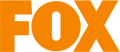
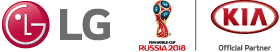

In [9]:
url = helena["url"]
timestamp = helena["timestamp"]
url = f"https://arquivo.pt/noFrame/replay/{timestamp}id_/{url}"
helena_file , path = open_site(url)
helena_file

In [10]:
urls_helena = extract_urls(helena_file)
urls_helena

{'http://blogues.publico.pt/provedordoleitor/',
 'http://cinecartaz.publico.pt',
 'http://cinecartaz.publico.pt/',
 'http://coleccoes.publico.pt',
 'http://comunique.publico.pt/cartaopublico/',
 'http://comunique.publico.pt/cartaopublico/#/',
 'http://emprego.publico.pt/',
 'http://feeds.feedburner.com/PublicoRSS',
 'http://imobiliario.publico.pt',
 'http://inimigo.publico.pt',
 'http://inimigo.publico.pt/',
 'http://lazer.publico.pt',
 'http://lazer.publico.pt/',
 'http://lazer.publico.pt/GuiaTV',
 'http://loja.publico.pt',
 'http://outdatedbrowser.com/pt-br',
 'http://p3.publico.pt',
 'http://p3.publico.pt/',
 'http://schema.org',
 'http://static.publico.pt/publicomais/',
 'http://static.publico.pt/sites/projectos/Publicitacao-Projecto-SI_IDT-PGlobal.pdf',
 'http://www.bmw.pt/teleservices',
 'http://www.w3.org/2000/svg',
 'https://a.brpx.io/ub.min.js',
 'https://acervo.publico.pt/utilizador/moderacao',
 'https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js',
 'https://api

In [11]:
urls2 = set()
for url in urls_helena:
        try:
            r = parse_url(url)
        except Exception as e:
            continue
        urls2.add(r[0])
print(urls2) # This urls migth not be in l dict but filters most links
process_site(url_helena, l)

{'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152'}


('.cache/111bc30a0a8a685827322b61516073e7fa51ad137e0b36037be129a8d7dec0f0.json',
 [3])

In [12]:
l2 = process_filtered_sites(l)
l2[:5]

124640/170808
[ERROR] https://arquivo.pt/noFrame/replay/20210316214940id_/https://www.publico.pt/2021/03/16/politica/noticia/inquerito-novo-banco-rejeita-despesa-130-mil-euros-traducoes-documentos-1954534 Failed to open site: 503
126473/170808
[ERROR] https://arquivo.pt/noFrame/replay/20210316214940id_/https://www.publico.pt/2021/03/16/politica/noticia/inquerito-novo-banco-rejeita-despesa-130-mil-euros-traducoes-documentos-1954534 Failed to open site: 503
128306/170808
[ERROR] https://arquivo.pt/noFrame/replay/20210316214940id_/https://www.publico.pt/2021/03/16/politica/noticia/inquerito-novo-banco-rejeita-despesa-130-mil-euros-traducoes-documentos-1954534 Failed to open site: 503
143694/170808
[ERROR] https://arquivo.pt/noFrame/replay/20220219010507id_/https://www.publico.pt/2022/02/14/mundo/noticia/pp-ganha-extremadireita-chave-futuro-politico-maior-regiao-espanha-1995365 Failed to open site: 429

[ERROR] https://arquivo.pt/noFrame/replay/20220214185539id_/https://www.publico.pt/2022

[{'length': '114509',
  'mime': 'text/html',
  'status': '200',
  'url': 'https://www.publico.pt/2000/11/18/ciencia/noticia/isotopos-denunciam-origem-da-cocaina-505',
  'url_normal': 'https://www.publico.pt/2000/11/18/ciencia/noticia/isotopos-denunciam-origem-da-cocaina-505',
  'date': '18/11/2000',
  'category': 'ciencia',
  'title': 'isotopos-denunciam-origem-da-cocaina-505',
  'number': 4291,
  'timestamp': 20200511210712,
  'path': '.cache/1b37a89034f01f81bec4834c132747446aee5c65d9cdb71eb2510ad581c03dcf.json',
  'connections': [4291]},
 {'length': '49063',
  'mime': 'text/html',
  'status': '200',
  'url': 'https://www.publico.pt/2001/05/05/sociedade/noticia/espanha-autoriza-heroina-para-tratamento-de-toxicodependentes-21638',
  'url_normal': 'https://www.publico.pt/2001/05/05/sociedade/noticia/espanha-autoriza-heroina-para-tratamento-de-toxicodependentes-21638',
  'date': '05/05/2001',
  'category': 'sociedade',
  'title': 'espanha-autoriza-heroina-para-tratamento-de-toxicodepende

In [13]:
with open("filtered_and_connections.json", 'w') as f:
    f.write(json.dumps(l2))

In [14]:
with open("filtered_and_connections.json", 'r') as f:
    s = f.read()
    l2 = json.loads(s)

In [15]:
add_all_pages_to_neo4h(l2)

Progress: 170807/170807
Progress: 73994/170807

[#E41D]  _: <CONNECTION> error: Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))): TimeoutError('timed out')
Transaction failed and will be retried in 1.0307625472548334s (Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))))


Progress: 170807/170807
